In [1]:
PREFIX = './fragments/Frag5/'

In [2]:
import numpy
import PIL.Image

image = numpy.array(PIL.Image.open(f"{PREFIX}/ir.png")) / 255
print(image.min(), image.max(), image.shape)

mask = numpy.array(PIL.Image.open(f"{PREFIX}/mask.png"))
print(mask.min(), mask.max(), mask.shape)

target = numpy.array(PIL.Image.open(f"{PREFIX}/inklabels.png"))
print(target.min(), target.max(), target.shape)

0.13725490196078433 1.0 (7309, 4560, 4)
0 255 (7309, 4560)
0 1 (7309, 4560)


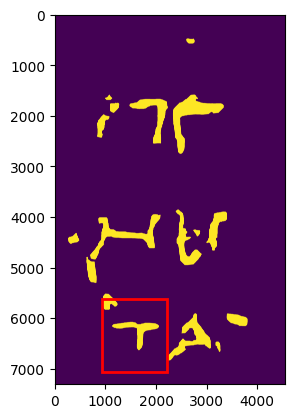

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

VAL_X = (928, 2208)
VAL_Y = (5616, 7056)

plt.imshow(target)
plt.gca().add_patch(
    patches.Rectangle(
        (VAL_X[0], VAL_Y[0]),
        VAL_X[1] - VAL_X[0],
        VAL_Y[1] - VAL_Y[0],
        linewidth = 2,
        edgecolor = 'r',
        facecolor = 'none'
    )
)

In [4]:
WINDOW = 128
HALF = (WINDOW // 2)
PADDING = (WINDOW // 4)

train_images, train_labels, train_idxs = [], [], []
test_images, test_labels, test_idxs = [], [], []
for i in range(image.shape[0] - WINDOW):
    if i % HALF != 0:
        continue
    for j in range(image.shape[1] - WINDOW):
        if j % HALF != 0:
            continue
        if mask[i][j] == 0:
            continue

        img = image[i:i + WINDOW, j:j + WINDOW]
        label = target[i:i + WINDOW, j:j + WINDOW]

        if (i > VAL_Y[0]) and (i < VAL_Y[1]) and (j > VAL_X[0]) and (j < VAL_X[1]):
            test_images.append(img)
            test_labels.append(label)
            test_idxs.append((i, j))
        else:
            train_images.append(img)
            train_labels.append(label)
            train_idxs.append((i, j))

train_images = numpy.stack(train_images)
train_labels = numpy.stack(train_labels)
test_images = numpy.stack(test_images)
test_labels = numpy.stack(test_labels)

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(4992, 128, 128, 4) (4992, 128, 128) (460, 128, 128, 4) (460, 128, 128)


In [ ]:
import torchvision.tv_tensors
import torchvision.transforms.v2

RESIZE_FACTOR = 2

WINDOW = WINDOW // RESIZE_FACTOR
HALF = (WINDOW // 2)
PADDING = (WINDOW // 4)

transform = torchvision.transforms.v2.Resize((WINDOW, WINDOW))

def resize(images, labels, idxs):
    images = torchvision.tv_tensors.Image(images)
    labels = torchvision.tv_tensors.Mask(labels)
    images, labels = transform(images, labels)
    idxs = [(i // RESIZE_FACTOR, j // RESIZE_FACTOR) for (i, j) in idxs]
    return images.numpy(), labels.numpy(), idxs

train_images, train_labels, train_idxs = resize(train_images, train_labels, train_idxs)
test_images, test_labels, test_idxs = resize(test_images, test_labels, test_idxs)

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

In [ ]:
import cvtda.topology

extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = False, return_diagrams = False)
extractor = extractor.fit(train_images, f"{PREFIX}/train")
train_features = extractor.transform(train_images, f"{PREFIX}/train")
test_features = extractor.transform(test_images, f"{PREFIX}/test")

train_features.shape, test_features.shape

Calculating inverted images
GreyscaleExtractor: processing ./fragments/Frag4//train/greyscale, do_fit = True
Saving the result to ././fragments/Frag4//train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch:   0%|          | 0/20 [00:00<?, ?it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
DiagramVectorizer: batch: 100%|██████████| 20/20 [00:12<00:00,  1.55it/s]


Saving the result to ././fragments/Frag4//train/greyscale/features.npy
GreyscaleExtractor: processing ./fragments/Frag4//train/greyscale, do_fit = False
Got the result from ././fragments/Frag4//train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/greyscale/features.npy
GreyscaleExtractor: processing ./fragments/Frag4//train/inverted_greyscale, do_fit = True
Saving the result to ././fragments/Frag4//train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.14it/s]


Saving the result to ././fragments/Frag4//train/inverted_greyscale/features.npy
GreyscaleExtractor: processing ./fragments/Frag4//train/inverted_greyscale, do_fit = False
Got the result from ././fragments/Frag4//train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/inverted_greyscale/features.npy
Fitting filtrations
Calculated radial centers for images of size 64x64: [12 25 38 51]x[12 25 38 51]
Fitting filtration 1/72: 2/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_-1, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.89it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 2/72: 2/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_1, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.20it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_1/features.npy
Fitting filtration 3/72: 2/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.26it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_-1/features.npy
Fitting filtration 4/72: 2/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_1, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.98it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_1/features.npy
Fitting filtration 5/72: 2/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.91it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_-1/features.npy
Fitting filtration 6/72: 2/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_1, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.33it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_1/features.npy
Fitting filtration 7/72: 2/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_0, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.93it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_0/features.npy
Fitting filtration 8/72: 2/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_0, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.41it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_0/features.npy
Fitting filtration 9/72: 2/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_12_12, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.92it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_12/features.npy
Fitting filtration 10/72: 2/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_12_25, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.30it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_25/features.npy
Fitting filtration 11/72: 2/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_12_38, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.99it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_38/features.npy
Fitting filtration 12/72: 2/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_12_51, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.07it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_51/features.npy
Fitting filtration 13/72: 2/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_25_12, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.36it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_12/features.npy
Fitting filtration 14/72: 2/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_25_25, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.20it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_25/features.npy
Fitting filtration 15/72: 2/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_25_38, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  6.48it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_38/features.npy
Fitting filtration 16/72: 2/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_25_51, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.82it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_51/features.npy
Fitting filtration 17/72: 2/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_38_12, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.36it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_12/features.npy
Fitting filtration 18/72: 2/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_38_25, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.92it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_25/features.npy
Fitting filtration 19/72: 2/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_38_38, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.81it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_38/features.npy
Fitting filtration 20/72: 2/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_38_51, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.95it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_51/features.npy
Fitting filtration 21/72: 2/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_51_12, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.93it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_12/features.npy
Fitting filtration 22/72: 2/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_51_25, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.56it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_25/features.npy
Fitting filtration 23/72: 2/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_51_38, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.46it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_38/features.npy
Fitting filtration 24/72: 2/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_51_51, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.37it/s]


Saving the result to ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_51/features.npy
Fitting filtration 25/72: 4/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_-1, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  6.01it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 26/72: 4/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_1, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.27it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_1/features.npy
Fitting filtration 27/72: 4/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.82it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_-1/features.npy
Fitting filtration 28/72: 4/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_1, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.47it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_1/features.npy
Fitting filtration 29/72: 4/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_0_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.60it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_0_-1/features.npy
Fitting filtration 30/72: 4/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_0_1, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.66it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_0_1/features.npy
Fitting filtration 31/72: 4/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_0, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.48it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_0/features.npy
Fitting filtration 32/72: 4/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_0, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.92it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_0/features.npy
Fitting filtration 33/72: 4/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_12_12, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  6.02it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_12_12/features.npy
Fitting filtration 34/72: 4/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_12_25, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.23it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_12_25/features.npy
Fitting filtration 35/72: 4/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_12_38, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  6.03it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_12_38/features.npy
Fitting filtration 36/72: 4/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_12_51, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.30it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_12_51/features.npy
Fitting filtration 37/72: 4/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_25_12, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.98it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_25_12/features.npy
Fitting filtration 38/72: 4/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_25_25, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.50it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_25_25/features.npy
Fitting filtration 39/72: 4/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_25_38, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  6.01it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_25_38/features.npy
Fitting filtration 40/72: 4/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_25_51, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.51it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_25_51/features.npy
Fitting filtration 41/72: 4/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_38_12, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.41it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_38_12/features.npy
Fitting filtration 42/72: 4/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_38_25, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.45it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_38_25/features.npy
Fitting filtration 43/72: 4/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_38_38, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.36it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_38_38/features.npy
Fitting filtration 44/72: 4/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_38_51, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.47it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_38_51/features.npy
Fitting filtration 45/72: 4/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_51_12, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  6.37it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_51_12/features.npy
Fitting filtration 46/72: 4/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_51_25, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.79it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_51_25/features.npy
Fitting filtration 47/72: 4/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_51_38, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  6.23it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_51_38/features.npy
Fitting filtration 48/72: 4/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/RadialFiltration_51_51, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.97it/s]


Saving the result to ././fragments/Frag4//train/filtrations/4/RadialFiltration_51_51/features.npy
Fitting filtration 49/72: 6/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/HeightFiltrartion_-1_-1, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.66it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 50/72: 6/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/HeightFiltrartion_1_1, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.76it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_1_1/features.npy
Fitting filtration 51/72: 6/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/HeightFiltrartion_1_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.04it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_1_-1/features.npy
Fitting filtration 52/72: 6/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/HeightFiltrartion_-1_1, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.58it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_-1_1/features.npy
Fitting filtration 53/72: 6/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/HeightFiltrartion_0_-1, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.23it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_0_-1/features.npy
Fitting filtration 54/72: 6/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/HeightFiltrartion_0_1, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.68it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_0_1/features.npy
Fitting filtration 55/72: 6/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/HeightFiltrartion_-1_0, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.73it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_-1_0/features.npy
Fitting filtration 56/72: 6/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/HeightFiltrartion_1_0, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.66it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/HeightFiltrartion_1_0/features.npy
Fitting filtration 57/72: 6/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_12_12, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.36it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_12_12/features.npy
Fitting filtration 58/72: 6/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_12_25, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.65it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_12_25/features.npy
Fitting filtration 59/72: 6/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_12_38, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.98it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_12_38/features.npy
Fitting filtration 60/72: 6/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_12_51, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.55it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_12_51/features.npy
Fitting filtration 61/72: 6/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_25_12, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.29it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_25_12/features.npy
Fitting filtration 62/72: 6/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_25_25, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.95it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_25_25/features.npy
Fitting filtration 63/72: 6/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_25_38, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.68it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_25_38/features.npy
Fitting filtration 64/72: 6/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_25_51, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.04it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_25_51/features.npy
Fitting filtration 65/72: 6/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_38_12, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.13it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_38_12/features.npy
Fitting filtration 66/72: 6/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_38_25, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.30it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_38_25/features.npy
Fitting filtration 67/72: 6/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_38_38, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.72it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_38_38/features.npy
Fitting filtration 68/72: 6/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_38_51, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.70it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_38_51/features.npy
Fitting filtration 69/72: 6/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_51_12, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.41it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_51_12/features.npy
Fitting filtration 70/72: 6/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_51_25, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.16it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_51_25/features.npy
Fitting filtration 71/72: 6/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_51_38, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:03<00:00,  5.91it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_51_38/features.npy
Fitting filtration 72/72: 6/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/6/RadialFiltration_51_51, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 20/20 [00:04<00:00,  4.59it/s]


Saving the result to ././fragments/Frag4//train/filtrations/6/RadialFiltration_51_51/features.npy
Applying filtrations
Applying filtration 1/72: 2/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_-1/features.npy
Applying filtration 2/72: 2/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_1/features.npy
Applying filtration 3/72: 2/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_-1/features.npy
Applying filtration 4/72: 2/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_1, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_1/features.npy
Applying filtration 5/72: 2/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_-1/features.npy
Applying filtration 6/72: 2/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_1, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_1/features.npy
Applying filtration 7/72: 2/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_0, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_0/features.npy
Applying filtration 8/72: 2/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_0, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_0/features.npy
Applying filtration 9/72: 2/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_12_12, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_12/features.npy
Applying filtration 10/72: 2/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_12_25, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_25/features.npy
Applying filtration 11/72: 2/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_12_38, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_38/features.npy
Applying filtration 12/72: 2/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_12_51, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_51/features.npy
Applying filtration 13/72: 2/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_25_12, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_12/features.npy
Applying filtration 14/72: 2/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_25_25, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_25/features.npy
Applying filtration 15/72: 2/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_25_38, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_38/features.npy
Applying filtration 16/72: 2/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_25_51, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_51/features.npy
Applying filtration 17/72: 2/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_38_12, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_12/features.npy
Applying filtration 18/72: 2/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_38_25, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_25/features.npy
Applying filtration 19/72: 2/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_38_38, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_38/features.npy
Applying filtration 20/72: 2/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_38_51, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_51/features.npy
Applying filtration 21/72: 2/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_51_12, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_12/features.npy
Applying filtration 22/72: 2/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_51_25, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_25/features.npy
Applying filtration 23/72: 2/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_51_38, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_38/features.npy
Applying filtration 24/72: 2/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_51_51, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_51/features.npy
Applying filtration 25/72: 4/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_-1/features.npy
Applying filtration 26/72: 4/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)
Got the result from ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_1/features.npy
Applying filtration 27/72: 4/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)
Got the result from ././fragments/Frag4//train/filtrations/4/HeightFiltr

GrayGeometryExtractor:   1%|          | 96/10229 [00:03<07:00, 24.07it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
GrayGeometryExtractor: 100%|██████████| 10229/10229 [01:59<00:00, 85.76it/s]


Saving the result to ././fragments/Frag4//train/geometry/features.npy
Got the result from ././fragments/Frag4//train/geometry/features.npy
Applying StandardScaler.
Calculating inverted images
GreyscaleExtractor: processing ./fragments/Frag4//train/greyscale, do_fit = False
Got the result from ././fragments/Frag4//train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/greyscale/features.npy
GreyscaleExtractor: processing ./fragments/Frag4//train/inverted_greyscale, do_fit = False
Got the result from ././fragments/Frag4//train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/inverted_greyscale/features.npy
Applying filtrations
Applying filtration 1/72: 2/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)
Go

d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_1/features.npy
Applying filtration 3/72: 2/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_-1/features.npy
Applying filtration 4/72: 2/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_1, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_1/features.npy
Applying filtration 5/72: 2/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_-1/features.npy
Applying filtration 6/72: 2/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_1, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_0_1/features.npy
Applying filtration 7/72: 2/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_0, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_-1_0/features.npy
Applying filtration 8/72: 2/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_0, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/HeightFiltrartion_1_0/features.npy
Applying filtration 9/72: 2/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_12_12, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_12/features.npy
Applying filtration 10/72: 2/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_12_25, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_25/features.npy
Applying filtration 11/72: 2/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_12_38, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_38/features.npy
Applying filtration 12/72: 2/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_12_51, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_12_51/features.npy
Applying filtration 13/72: 2/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_25_12, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_12/features.npy
Applying filtration 14/72: 2/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_25_25, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_25/features.npy
Applying filtration 15/72: 2/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_25_38, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_38/features.npy
Applying filtration 16/72: 2/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_25_51, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_25_51/features.npy
Applying filtration 17/72: 2/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_38_12, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_12/features.npy
Applying filtration 18/72: 2/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_38_25, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_25/features.npy
Applying filtration 19/72: 2/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_38_38, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_38/features.npy
Applying filtration 20/72: 2/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_38_51, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_38_51/features.npy
Applying filtration 21/72: 2/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_51_12, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_12/features.npy
Applying filtration 22/72: 2/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_51_25, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_25/features.npy
Applying filtration 23/72: 2/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_51_38, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_38/features.npy
Applying filtration 24/72: 2/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/2/RadialFiltration_51_51, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/2/RadialFiltration_51_51/features.npy
Applying filtration 25/72: 4/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Got the result from ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_-1_-1/features.npy
Applying filtration 26/72: 4/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)
Got the result from ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ././fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_1/features.npy
Applying filtration 27/72: 4/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag4//train/filtrations/4/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)
Got the result from ././fragments/Frag4//train/filtrations/4/HeightFiltr

DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]


Saving the result to ././fragments/Frag4//test/greyscale/features.npy
GreyscaleExtractor: processing ./fragments/Frag4//test/inverted_greyscale, do_fit = False
Saving the result to ././fragments/Frag4//test/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]


Saving the result to ././fragments/Frag4//test/inverted_greyscale/features.npy
Applying filtrations
Applying filtration 1/72: 2/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 100.01it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_-1_-1/features.npy
Applying filtration 2/72: 2/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 95.24it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_1_1/features.npy
Applying filtration 3/72: 2/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 100.02it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_1_-1/features.npy
Applying filtration 4/72: 2/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/HeightFiltrartion_-1_1, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 166.69it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_-1_1/features.npy
Applying filtration 5/72: 2/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/HeightFiltrartion_0_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 133.34it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_0_-1/features.npy
Applying filtration 6/72: 2/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/HeightFiltrartion_0_1, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 181.87it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_0_1/features.npy
Applying filtration 7/72: 2/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/HeightFiltrartion_-1_0, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 100.01it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_-1_0/features.npy
Applying filtration 8/72: 2/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/HeightFiltrartion_1_0, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 90.93it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/HeightFiltrartion_1_0/features.npy
Applying filtration 9/72: 2/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_12_12, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 105.26it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_12_12/features.npy
Applying filtration 10/72: 2/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_12_25, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 166.72it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_12_25/features.npy
Applying filtration 11/72: 2/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_12_38, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 166.76it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_12_38/features.npy
Applying filtration 12/72: 2/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_12_51, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 95.27it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_12_51/features.npy
Applying filtration 13/72: 2/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_25_12, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 95.26it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_25_12/features.npy
Applying filtration 14/72: 2/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_25_25, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.96it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_25_25/features.npy
Applying filtration 15/72: 2/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_25_38, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.84it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_25_38/features.npy
Applying filtration 16/72: 2/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_25_51, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 90.91it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_25_51/features.npy
Applying filtration 17/72: 2/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_38_12, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 83.33it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_38_12/features.npy
Applying filtration 18/72: 2/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_38_25, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 166.61it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_38_25/features.npy
Applying filtration 19/72: 2/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_38_38, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 181.87it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_38_38/features.npy
Applying filtration 20/72: 2/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_38_51, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 90.91it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_38_51/features.npy
Applying filtration 21/72: 2/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_51_12, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 95.24it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_51_12/features.npy
Applying filtration 22/72: 2/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_51_25, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 105.27it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_51_25/features.npy
Applying filtration 23/72: 2/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_51_38, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 90.92it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_51_38/features.npy
Applying filtration 24/72: 2/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/2/RadialFiltration_51_51, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)



d:\Programs\Programming\Python\lib\site-packages\gtda\diagrams\preprocessing.py:295: RuntimeWarning: invalid value encountered in divide
  Xs[:, :, :2] /= self.scale_


Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 90.72it/s]

Saving the result to ././fragments/Frag4//test/filtrations/2/RadialFiltration_51_51/features.npy
Applying filtration 25/72: 4/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 95.25it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_-1_-1/features.npy
Applying filtration 26/72: 4/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 153.86it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_1_1/features.npy
Applying filtration 27/72: 4/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 153.85it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_1_-1/features.npy
Applying filtration 28/72: 4/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/HeightFiltrartion_-1_1, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 95.23it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_-1_1/features.npy
Applying filtration 29/72: 4/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/HeightFiltrartion_0_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.95it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_0_-1/features.npy
Applying filtration 30/72: 4/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/HeightFiltrartion_0_1, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.97it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_0_1/features.npy
Applying filtration 31/72: 4/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/HeightFiltrartion_-1_0, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.98it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_-1_0/features.npy
Applying filtration 32/72: 4/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/HeightFiltrartion_1_0, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 80.00it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/HeightFiltrartion_1_0/features.npy
Applying filtration 33/72: 4/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_12_12, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 181.83it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_12_12/features.npy
Applying filtration 34/72: 4/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_12_25, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 95.24it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_12_25/features.npy
Applying filtration 35/72: 4/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_12_38, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 95.25it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_12_38/features.npy
Applying filtration 36/72: 4/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_12_51, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 90.91it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_12_51/features.npy
Applying filtration 37/72: 4/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_25_12, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 83.38it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_25_12/features.npy
Applying filtration 38/72: 4/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_25_25, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 90.75it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_25_25/features.npy
Applying filtration 39/72: 4/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_25_38, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 95.23it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_25_38/features.npy
Applying filtration 40/72: 4/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_25_51, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 153.85it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_25_51/features.npy
Applying filtration 41/72: 4/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_38_12, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 153.88it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_38_12/features.npy
Applying filtration 42/72: 4/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_38_25, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 100.01it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_38_25/features.npy
Applying filtration 43/72: 4/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_38_38, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 95.24it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_38_38/features.npy
Applying filtration 44/72: 4/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_38_51, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.97it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_38_51/features.npy
Applying filtration 45/72: 4/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_51_12, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 86.99it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_51_12/features.npy
Applying filtration 46/72: 4/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_51_25, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 166.67it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_51_25/features.npy
Applying filtration 47/72: 4/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_51_38, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 80.01it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_51_38/features.npy
Applying filtration 48/72: 4/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/4/RadialFiltration_51_51, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 181.86it/s]

Saving the result to ././fragments/Frag4//test/filtrations/4/RadialFiltration_51_51/features.npy
Applying filtration 49/72: 6/HeightFiltrartion_-1_-1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/HeightFiltrartion_-1_-1, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 30.77it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_-1_-1/features.npy
Applying filtration 50/72: 6/HeightFiltrartion_1_1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/HeightFiltrartion_1_1, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 32.26it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_1_1/features.npy
Applying filtration 51/72: 6/HeightFiltrartion_1_-1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/HeightFiltrartion_1_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 32.26it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_1_-1/features.npy
Applying filtration 52/72: 6/HeightFiltrartion_-1_1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/HeightFiltrartion_-1_1, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_-1_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 28.57it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_-1_1/features.npy
Applying filtration 53/72: 6/HeightFiltrartion_0_-1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/HeightFiltrartion_0_-1, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_0_-1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 37.74it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_0_-1/features.npy
Applying filtration 54/72: 6/HeightFiltrartion_0_1
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/HeightFiltrartion_0_1, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_0_1/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 35.71it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_0_1/features.npy
Applying filtration 55/72: 6/HeightFiltrartion_-1_0
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/HeightFiltrartion_-1_0, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_-1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 35.09it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_-1_0/features.npy
Applying filtration 56/72: 6/HeightFiltrartion_1_0
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/HeightFiltrartion_1_0, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_1_0/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 31.25it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/HeightFiltrartion_1_0/features.npy
Applying filtration 57/72: 6/RadialFiltration_12_12
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_12_12, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_12_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 28.17it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_12_12/features.npy
Applying filtration 58/72: 6/RadialFiltration_12_25
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_12_25, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_12_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 25.64it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_12_25/features.npy
Applying filtration 59/72: 6/RadialFiltration_12_38
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_12_38, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_12_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 29.85it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_12_38/features.npy
Applying filtration 60/72: 6/RadialFiltration_12_51
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_12_51, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_12_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 31.25it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_12_51/features.npy
Applying filtration 61/72: 6/RadialFiltration_25_12
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_25_12, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_25_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 26.32it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_25_12/features.npy
Applying filtration 62/72: 6/RadialFiltration_25_25
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_25_25, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_25_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 25.32it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_25_25/features.npy
Applying filtration 63/72: 6/RadialFiltration_25_38
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_25_38, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_25_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 23.26it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_25_38/features.npy
Applying filtration 64/72: 6/RadialFiltration_25_51
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_25_51, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_25_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 33.33it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_25_51/features.npy
Applying filtration 65/72: 6/RadialFiltration_38_12
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_38_12, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_38_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 28.99it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_38_12/features.npy
Applying filtration 66/72: 6/RadialFiltration_38_25
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_38_25, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_38_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 25.64it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_38_25/features.npy
Applying filtration 67/72: 6/RadialFiltration_38_38
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_38_38, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_38_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 32.79it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_38_38/features.npy
Applying filtration 68/72: 6/RadialFiltration_38_51
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_38_51, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_38_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 32.26it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_38_51/features.npy
Applying filtration 69/72: 6/RadialFiltration_51_12
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_51_12, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_51_12/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 25.64it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_51_12/features.npy
Applying filtration 70/72: 6/RadialFiltration_51_25
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_51_25, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_51_25/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 24.10it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_51_25/features.npy
Applying filtration 71/72: 6/RadialFiltration_51_38
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_51_38, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_51_38/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 21.05it/s]

Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_51_38/features.npy
Applying filtration 72/72: 6/RadialFiltration_51_51
FiltrationExtractor: processing ./fragments/Frag4//test/filtrations/6/RadialFiltration_51_51, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=-1)


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_51_51/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:00<00:00, 29.41it/s]


Saving the result to ././fragments/Frag4//test/filtrations/6/RadialFiltration_51_51/features.npy


GrayGeometryExtractor: 100%|██████████| 551/551 [00:05<00:00, 106.29it/s]


Saving the result to ././fragments/Frag4//test/geometry/features.npy
Applying StandardScaler.


((10229, 7353), (551, 7353))

In [ ]:
import cvtda.segmentation

cvtda.segmentation.segment(
    train_images, train_features, train_labels,
    test_images, test_features, test_labels,
    dump_name = f"{PREFIX}/predictions", remove_cross_maps = True
)

Trying no - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x00000269A325AB00>
Parameters: 42163945


100%|██████████| 100/100 [23:02<00:00, 13.83s/it, loss=204, lr=1e-5, Accuracy=0.846, AUC-ROC=0.5, Precision=0, Recall=0, F1-score=0, Jaccard score=0] 


Saving the result to ././fragments/Frag4//predictions/no.npy
{'model': 'Без признаков', 'Accuracy': 0.8455272196857986, 'AUC-ROC': 0.49990171812752177, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0, 'Jaccard score': 0.0}
Trying images - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x00000269A325AC20>
Parameters: 42163945


100%|██████████| 100/100 [24:19<00:00, 14.60s/it, loss=80.1, lr=1e-5, Accuracy=0.907, AUC-ROC=0.92, Precision=0.864, Recall=0.471, F1-score=0.61, Jaccard score=0.439]   


Saving the result to ././fragments/Frag4//predictions/images.npy
{'model': 'Без топологических признаков', 'Accuracy': 0.9068884875510436, 'AUC-ROC': 0.920219826128771, 'Precision': 0.8642451341399263, 'Recall': 0.47125454279477613, 'F1-score': 0.6099281828154787, 'Jaccard score': 0.4387745836404619}
Trying topological - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x00000269A325B040>
Parameters: 42163945


100%|██████████| 100/100 [26:39<00:00, 16.00s/it, loss=51.5, lr=1e-5, Accuracy=0.862, AUC-ROC=0.871, Precision=0.833, Recall=0.137, F1-score=0.235, Jaccard score=0.133]  


Saving the result to ././fragments/Frag4//predictions/topological.npy
{'model': 'Только топологические признаки', 'Accuracy': 0.8623964063917876, 'AUC-ROC': 0.8709078579524686, 'Precision': 0.8332516368474493, 'Recall': 0.13652622128394368, 'F1-score': 0.23461186786970334, 'Jaccard score': 0.1328953466944387}
Trying combined - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x00000269A325AC80>
Parameters: 42237673


100%|██████████| 100/100 [31:38<00:00, 18.99s/it, loss=63.8, lr=1e-5, Accuracy=0.883, AUC-ROC=0.93, Precision=0.828, Recall=0.306, F1-score=0.447, Jaccard score=0.288]  


Saving the result to ././fragments/Frag4//predictions/combined.npy
{'model': 'Комбинированные признаки', 'Accuracy': 0.8830216367967332, 'AUC-ROC': 0.9303924647571764, 'Precision': 0.8278892427870643, 'Recall': 0.3064288971944388, 'F1-score': 0.4472981233827679, 'Jaccard score': 0.2880772736343093}


,model,Accuracy,AUC-ROC,Precision,Recall,F1-score,Jaccard score
0,Без признаков,0.845527,0.499902,0.000000,0.000000,0.000000,0.000000
1,Без топологических признаков,0.906888,0.920220,0.864245,0.471255,0.609928,0.438775
2,Только топологические признаки,0.862396,0.870908,0.833252,0.136526,0.234612,0.132895
3,Комбинированные признаки,0.883022,0.930392,0.827889,0.306429,0.447298,0.288077


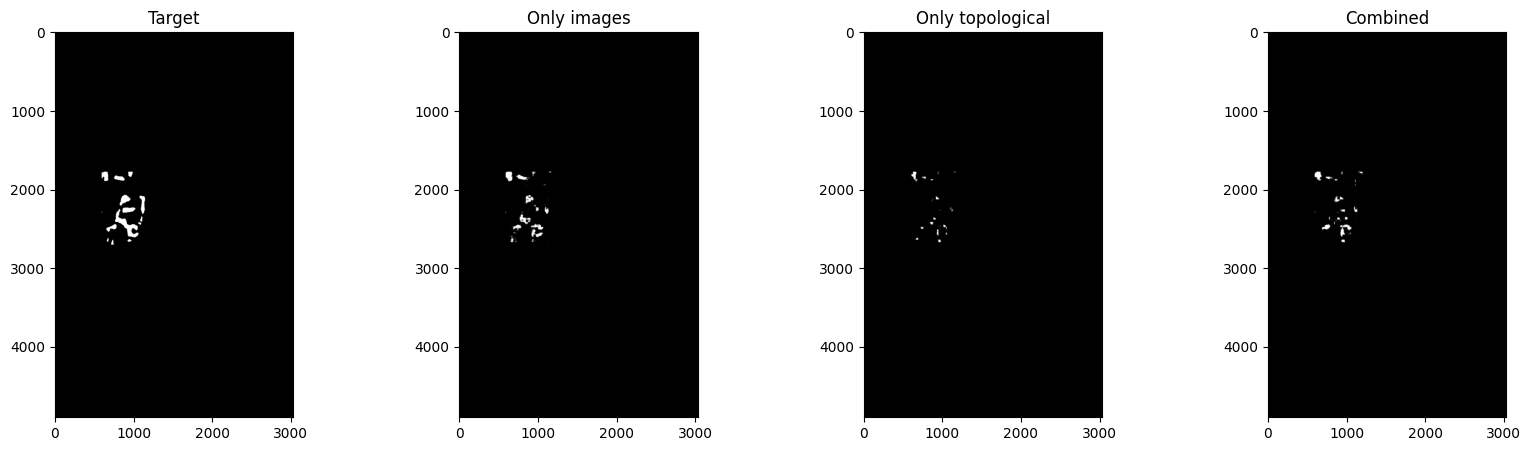

In [ ]:
import numpy
import matplotlib.pyplot as plt

def restore(imgs, idxs, ax):
    restored = numpy.zeros((image.shape[0] // RESIZE_FACTOR, image.shape[1] // RESIZE_FACTOR))

    for img, (i, j) in zip(imgs, idxs):
        i_from, i_to = i + PADDING, i + WINDOW - PADDING
        j_from, j_to = j + PADDING, j + WINDOW - PADDING
        img_part = img[PADDING:-PADDING, PADDING:-PADDING]
        restored[i_from:i_to, j_from:j_to] = img_part

    ax.imshow(restored, cmap = 'gray')

fig, axes = plt.subplots(1, 4, figsize = (20, 5))

axes[0].set_title("Target")
restore(test_labels, test_idxs, axes[0])

axes[1].set_title("Only images")
restore(numpy.squeeze(numpy.load(f'{PREFIX}/predictions/images.npy')), test_idxs, axes[1])

axes[2].set_title("Only topological")
restore(numpy.squeeze(numpy.load(f'{PREFIX}/predictions/topological.npy')), test_idxs, axes[2])

axes[3].set_title("Combined")
restore(numpy.squeeze(numpy.load(f'{PREFIX}/predictions/combined.npy')), test_idxs, axes[3])